# Avocado Project

# Importing Libraries

In [23]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from subprocess import check_output
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Importing Dataset

In [34]:
avocado = pd.read_csv('avocado (1).csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [35]:
avocado.shape

(18249, 14)

In [36]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Statistical Summary

In [37]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [38]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [39]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [40]:
avocado.drop('Unnamed: 0', axis=1, inplace=True)

In [41]:
avocado.rename(columns={'4046':'Small HASS sold',
                        '4225':'Large HASS sold',
                        '4770':'XLarge HASS sold'},
               inplace=True)

In [42]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [43]:
avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [44]:
avocado = pd.get_dummies(avocado, columns=['type'], drop_first=True)
avocado.head()

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,False
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,False
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,False
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,False
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,False


In [45]:
print('Organice', avocado[avocado['type_organic']==1]['Date'].count())
print('Conventional', avocado[avocado['type_organic']==0]['Date'].count())

Organice 9123
Conventional 9126


In [52]:
le = LabelEncoder()
avocado['region'] = le.fit_transform(avocado['region'])
avocado.head()

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,False
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,False
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,False
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,False
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,False


In [54]:
avocado.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

# Data Visualization

C:\Users\asifj\AppData\Local\Temp\ipykernel_12032\3357741774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avocado['AveragePrice'], axlabel='Distribution of average price')
D:\data science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Distribution of average price', ylabel='Density'>

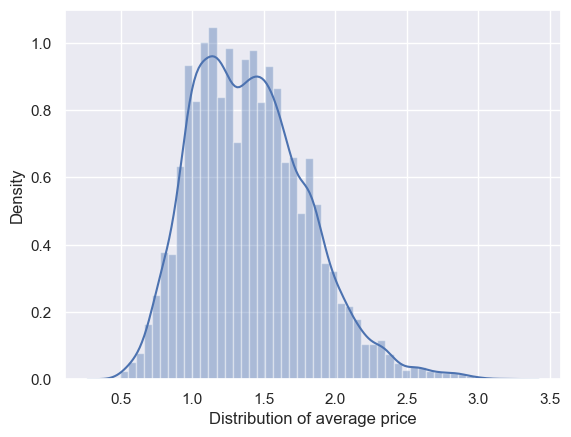

In [56]:
sns.distplot(avocado['AveragePrice'], axlabel='Distribution of average price')

# Outliers Detection & Treatment

<Axes: xlabel='type_organic', ylabel='AveragePrice'>

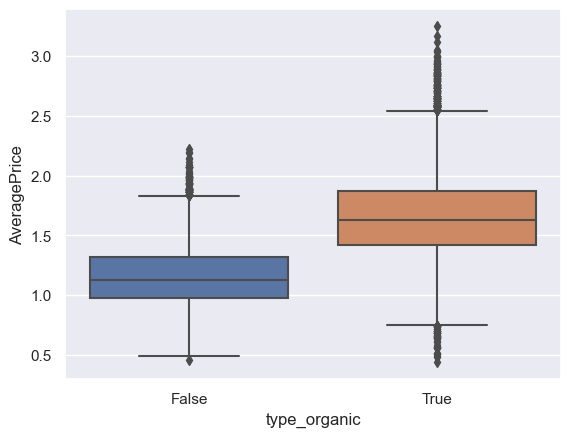

In [57]:
sns.boxplot(x='type_organic', y='AveragePrice', data=avocado)


<Axes: xlabel='year', ylabel='AveragePrice'>

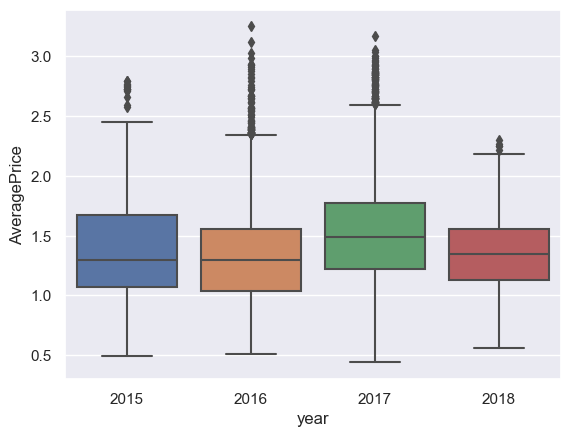

In [58]:
sns.boxplot(x='year', y='AveragePrice', data=avocado)


<Axes: xlabel='region'>

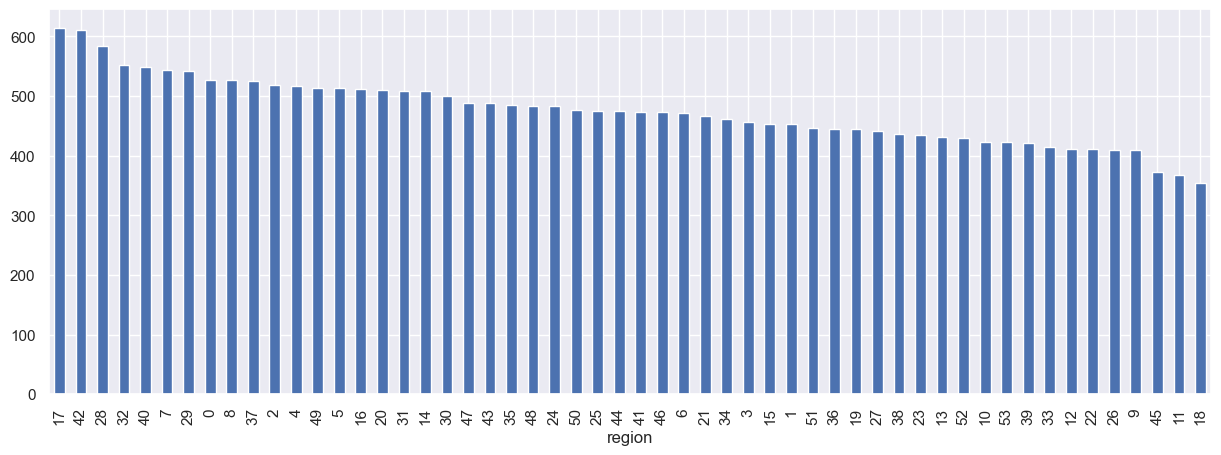

In [59]:
avocado.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5))

# Feature Engineering

In [60]:
# Creating a new dataframe with few columns only and create train and test data
avocado_new = avocado[['AveragePrice', 'Total Volume', 'Small HASS sold', 'Large HASS sold', 'XLarge HASS sold',
                       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']]

X = avocado_new[['AveragePrice', 'Total Volume', 'Small HASS sold', 'Large HASS sold', 'XLarge HASS sold',
                 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']] # feature columns
y = avocado_new.type_organic # predictor variable

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('X Train Shape: ',X_train.shape)
print('y Train Shape: ',y_train.shape)

print('X Test Shape: ',X_test.shape)
print('y Test Shape: ',y_test.shape)

X Train Shape:  (14599, 12)
y Train Shape:  (14599,)
X Test Shape:  (3650, 12)
y Test Shape:  (3650,)


In [62]:
scaler = StandardScaler().fit(avocado_new)
avocado_new_std = scaler.transform(avocado_new)
avocado_new = pd.DataFrame(avocado_new_std)
avocado_new.columns = ['AveragePrice', 'Total Volume', 'Small HASS sold', 'Large HASS sold', 'XLarge HASS sold',
                       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']

In [63]:
avocado_new.head()

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type_organic,year,region
0,-0.188689,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-0.999836,-1.221282,-1.700252
1,-0.139020,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-0.999836,-1.221282,-1.700252
2,-1.182069,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-0.999836,-1.221282,-1.700252
3,-0.809551,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-0.999836,-1.221282,-1.700252
4,-0.312861,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-0.999836,-1.221282,-1.700252


In [64]:
feature_cols = ['AveragePrice', 'Total Volume', 'Small HASS sold', 'Large HASS sold', 'XLarge HASS sold', 
                'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']
X = avocado_new[feature_cols]
y = avocado_new.AveragePrice

def split(X,y):
  return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (14599, 12)
y_train shape:  (14599,)
X_test shape:  (3650, 12)
y_test shape:  (3650,)


# Modelling Selection

In [65]:
linreg1 = LinearRegression()
linreg1.fit(X_train, y_train)

LinearRegression()

In [66]:
feature_cols.insert(0,'Intercept')
coef = linreg1.coef_.tolist()
coef.insert(0, linreg1.intercept_)
eq1 = zip(feature_cols, coef)

for c1, c2 in eq1:
    print(c1,c2)

y_pred_train = linreg1.predict(X_train)
y_pred_test = linreg1.predict(X_test)

"""### Model Evaluation for Linear Regression Model 1"""

print('Model Evaluation for Linear Regression Model 1')

Intercept -3.0357660829594124e-18
AveragePrice 0.9999999999999988
Total Volume -4.328464941985088e-14
Small HASS sold 1.592736682532958e-14
Large HASS sold 1.4819605630240843e-14
XLarge HASS sold 1.304184055725004e-15
Total Bags -9.389152753323405e-12
Small Bags 7.113068310439996e-12
Large Bags 2.325631457871551e-12
XLarge Bags 1.6856540735684908e-13
type_organic 3.211869723660534e-17
year 6.234621361223871e-17
region 8.16289688745855e-19
Model Evaluation for Linear Regression Model 1


In [67]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print(f'RMSE for training set is {RMSE_train} and RMSE for test set is {RMSE_test}')

RMSE for training set is 1.2190318726424922e-15 and RMSE for test set is 1.216380747305671e-15


In [68]:
yhat = linreg1.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('r_squared for train data: ',r_squared, 'and adjusted_r_squared for train data: ',adjusted_r_squared)

r_squared for train data:  1.0 and adjusted_r_squared for train data:  1.0


In [69]:
yhat = linreg1.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('r_squared for test data: ',r_squared, 'and adjusted_r_squared for test data: ',adjusted_r_squared)

r_squared for test data:  1.0 and adjusted_r_squared for test data:  1.0


In [72]:
model2 = RandomForestRegressor(random_state=0)
model2.fit(X_train, y_train)
y_pred_train_2 = model2.predict(X_train)
y_pred_test_2 = model2.predict(X_test)

"""###Model Evaluation for Random Forest Regressor"""

print('Model Evaluation for Random Forest Regressor Model 2')

Model Evaluation for Random Forest Regressor Model 2


In [73]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_2))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_2))
print(f'RMSE for training set is {RMSE_train} and RMSE for test set is {RMSE_test}')

RMSE for training set is 0.0011399702539128382 and RMSE for test set is 0.0007902906678221987


In [74]:
yhat = linreg1.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('r_squared for train data: ',r_squared, 'and adjusted_r_squared for train data: ',adjusted_r_squared)

r_squared for train data:  1.0 and adjusted_r_squared for train data:  1.0


In [75]:
yhat = linreg1.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('r_squared for test data: ',r_squared, 'and adjusted_r_squared for test data: ',adjusted_r_squared)

r_squared for test data:  1.0 and adjusted_r_squared for test data:  1.0
